<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 6: Data Processing & Cleaning for Data Science: Data Wrangling Documents and Web Scraping

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Wrangling Documents and Web Scraping. It provides a set of practical Training challenges that allow grasping the different concepts presented in  lecture 6.

## Parsing and Processing Text Documents

### Challenge 1: 
Given the text shown in the code below, you are asked to do the basic parsing and processing text operations checklist seen in the lecture (Slides 4-9) to provide a basic text analysis report.

``` python
import string

text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
```

`Hint:`
These are some of the basic text analysis operations

* Reading & Extracting Texts
*  Basic Text Cleaning:
    * Removing unnecessary punctuation, tags
    * Tokenization
    * Removing stop words
* Basic words Analysis


Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using 

[nltk_data] Downloading package stopwords to C:\Users\el badr
[nltk_data]     info\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['data', 'science', 'incorporates', 'tools', 'multiple', 'disciplines', 'gather', 'data', 'set', 'process', 'derive', 'insights', 'data', 'set', 'extract', 'meaningful', 'data', 'set', 'interpret', 'decisionmaking', 'purposes', 'disciplinary', 'areas', 'make', 'data', 'science', 'field', 'include', 'mining', 'statistics', 'machine', 'learning', 'analytics', 'programming', 'data', 'mining', 'applies', 'algorithms', 'complex', 'data', 'set', 'reveal', 'patterns', 'used', 'extract', 'useful', 'relevant', 'data', 'set', 'statistical', 'measures', 'predictive', 'analytics', 'use', 'extracted', 'data', 'gauge', 'events', 'likely', 'happen', 'future', 'based', 'data', 'shows', 'happened', 'past', 'machine', 'learning', 'artificial', 'intelligence', 'tool', 'processes', 'mass', 'quantities', 'data', 'human', 'would', 'unable', 'process', 'lifetime', 'machine', 'learning', 'perfects', 'decision', 'model', 'presented', 'predictive', 'analytics', 'matching', 'likelihood', 'event', 'happening', 'a

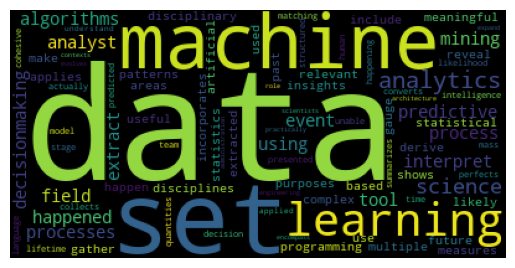

In [1]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
translator = str.maketrans('', '', string.punctuation + string.digits) 
print(text)
text = text.translate(translator)
print('-----------------------------------------------------------------------------------')
print(text)
print('-----------------------------------------------------------------------------------')
# nltk.download('punkt_tab')
tokens = nltk.word_tokenize(text)
print(tokens)
print('-----------------------------------------------------------------------------------')
nltk.download('stopwords')
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = text.lower().split()
words = [w for w in words if w not in en_stopwords]
print(words)

cnt_fdist = nltk.FreqDist(words)
cnt_fdist.most_common(20)


wordcloud = WordCloud(collocations=False).generate(' '.join(words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Challenge 2:
You've just started a new data science position at the Cybersecurity Unit of the U.S. DEPARTMENT OF COMMERCE. The department wants to build, test, and evaluate new machine learning model using thier 2020 annual report document availabe in the local data folder:`2020_Cybersecurity_and_Privacy_Annual_Re.docx`. 

You are asked to provide a visual report summarizing the most common frequency keywords used in their report. 



In [4]:
from glob import glob
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from docx import Document  

word_files = glob('data/*.docx')

def extract_text_from_docx(file_path):
    doc = Document(file_path)
    text = ""
    for para in doc.paragraphs:
        text += para.text + "\n"
    return text

text = extract_text_from_docx(word_files[0]) 
print(text)
print('-----------------------------------------------------------------------------------')

translator = str.maketrans('', '', string.punctuation + string.digits + '\n')
text = text.translate(translator)
print(text)
print('-----------------------------------------------------------------------------------')

tokens = nltk.word_tokenize(text)
print(tokens)
print('-----------------------------------------------------------------------------------')

en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = text.lower().split()
words = [w for w in words if w not in en_stopwords]

df = pd.DataFrame(columns=['content'])
df = pd.concat([df, pd.DataFrame([[text]], columns=['content'])], ignore_index=True)
print(df)

cnt_fdist = nltk.FreqDist(words)
print(cnt_fdist.most_common(20))

# Create a word cloud (optional)
# wordcloud = WordCloud(collocations=False).generate(' '.join(words))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()


2020
Cybersecurity and Privacy Annual Report
























































NIST SPECIAL PUBLICATION 800-214

2020 Cybersecurity and
Privacy Annual Report





PATRICK O’REILLY, EDITOR
Computer Security Division Information Technology Laboratory
KRISTINA RIGOPOULOS, EDITOR
Applied Cybersecurity Division Information Technology Laboratory



CO-EDITORS:
Larry Feldman Greg Witte
Huntington Ingalls Industries Annapolis Junction, Maryland







THIS PUBLICATION IS AVAILABLE FREE OF CHARGE FROM
https://doi.org/10.6028/NIST.SP.800-214

SEPTEMBER 2021





U.S. DEPARTMENT OF COMMERCE Gina M. Raimondo, Secretary

NATIONAL INSTITUTE OF STANDARDS AND TECHNOLOGY
James K. Olthoff, Performing the Non-Exclusive Functions and Duties of the Under Secretary of Commerce for Standards and Technology & Director, National Institute of Standards and Technology

Table of Contents

Foreword




With each day bringing new cybersecurity and privacy challenges and advances, it is little 

## Web Scraping: Parsing and processing Web Pages
### Challenge 3:
We want to analyse text collected from https://en.wikipedia.org/wiki/Data_science  wikipedia page. We are only interested on the text content of links html anchor (`a`).  

1. Do the cheklist basic text analyses to provid a visyal summarry of all href text links available on the page.

`Hint:`
1. Follow and adjust the procedures in Lecture 6 - Slides: 14-16 - to collect the required text. In case, you have not figured out how to collect the required information, here is below a code that help you:


``` python
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import lxml

url = 'https://en.wikipedia.org/wiki/Data_science'
page = urlopen(url).read().decode('utf-8')

soup = bs(page)

links = soup.find_all('a')
all_link_text = []

all_link_text.extend([a.text for a in links])

text = ' '.join(all_link_text)
text
``` 

2. Follow the checklist text analysis to clean and visualize the most common words used in the collected text.

### Challenge 4:
We want to analyse text related to data science topic collected from different web pages: https://www.heavy.ai/learn/data-science,  https://en.wikipedia.org/wiki/Data_science, https://www.ibm.com/cloud/learn/data-science-introduction, and https://deepai.org/machine-learning-glossary-and-terms/data-science alongside with the text string object of challenge 01.

Note that we are only interested on the text content of  html anchor (`p`) from the webpages.  

1. Do the required procedures to collect all  `p` text available on all of the aformentioned web pages.
2. Append the collected text with the text string object of challenge 01
3. Do the cheklist basic text analyses to provid a visyal summarry of the most frequently used keywords on the resulted text.



In [5]:
# from urllib.request import urlopen
# from bs4 import BeautifulSoup as bs
# import lxml

# url = 'https://en.wikipedia.org/wiki/Data_science'
# page = urlopen(url).read().decode('utf-8')

# soup = bs(page)

# links = soup.find_all('a')

# all_link_text = []

# all_link_text.extend([a.text for a in links])

# text = ' '.join(all_link_text)

# translator = str.maketrans('', '', string.punctuation + string.digits + '\n') 
# print(text)
# text = text.translate(translator)
# print('-----------------------------------------------------------------------------------')
# print(text)
# print('-----------------------------------------------------------------------------------')
# # nltk.download('punkt_tab')
# tokens = nltk.word_tokenize(text)
# print(tokens)
# print('-----------------------------------------------------------------------------------')
# en_stopwords = stopwords.words('english')
# en_stopwords = set(en_stopwords)
# words = text.lower().split()
# words = [w for w in words if w not in en_stopwords]
# print(words)

# cnt_fdist = nltk.FreqDist(words)
# cnt_fdist.most_common(20)


# wordcloud = WordCloud(collocations=False).generate(' '.join(words))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()
import requests as rq
from bs4 import BeautifulSoup as bs
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
list_links = ['https://www.heavy.ai/learn/data-science, https://en.wikipedia.org/wiki/Data_science', 'https://www.ibm.com/cloud/learn/data-science-introduction', 'https://deepai.org/machine-learning-glossary-and-terms/data-science']
all_text = []
for link in list_links:
         html = rq.get(link).text
         soup = bs(html)
         paragraph_text = soup.find_all('p')
         all_text.extend([p.text for p in paragraph_text])


additional_text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
all_text.append(additional_text)
text = ' '.join(all_text)


translator = str.maketrans('', '', string.punctuation + string.digits) 

text = text.translate(translator)
print('-----------------------------------------------------------------------------------')
print(text)
print('-----------------------------------------------------------------------------------')
# nltk.download('punkt_tab')
tokens = nltk.word_tokenize(text)
print(tokens)
print('-----------------------------------------------------------------------------------')
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = text.lower().split()
words = [w for w in words if w not in en_stopwords]
print(words)

cnt_fdist = nltk.FreqDist(words)
cnt_fdist.most_common(20)


# wordcloud = WordCloud(collocations=False).generate(' '.join(words))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()



-----------------------------------------------------------------------------------
Unfortunately the page you are looking for could not be foundPlease go back or alternatively try any of the options below HEAVYAI is the Extreme Analytics platform that redefines the limits of scale and speed in big data analytics There are three ways to choose HEAVYAI explore the editions to learn which is the best version for your needs Learn more about the HEAVYAI platform and ecosystem from a variety of content based on your needs Data science combines math and statistics specialized programming advanced analytics artificial intelligence AI and machine learning with specific subject matter expertise to uncover actionable insights hidden in an organization’s data These insights can be used to guide decision making and strategic planning The accelerating volume of data sources and subsequently data has made data science is one of the fastest growing field across every industry As a result it is no sur

[('data', 108),
 ('science', 29),
 ('learning', 15),
 ('machine', 14),
 ('tools', 14),
 ('ai', 13),
 ('models', 13),
 ('scientists', 12),
 ('business', 10),
 ('analytics', 7),
 ('insights', 7),
 ('scientist', 7),
 ('also', 7),
 ('ibm', 7),
 ('cloud', 7),
 ('use', 7),
 ('intelligence', 6),
 ('processes', 6),
 ('typically', 6),
 ('analyst', 6)]

### Challenge 4:

You're in the initial stages of a new position as a Data Scientist at Goodreads (https://www.goodreads.com/) company. Your primary task is to build a robust understanding of customer sentiments and preferences related to quots, focusing on the `Motivational` tag.

The team you're collaborating with has a specific interest in quotes text, authors or Book titles, tags, and number of likes  from the `Motivational` tag on Goodreads as shown in the figure. They've tasked you with conducting web scraping and basic text analysis on quotes from this category. Your goal is to provide insights into the most frequently occurring keywords by author, or book title, or keyword tags.


<figure>
  <IMG src="figures/goodbooks.png"  ALIGN="right">
</figure>

#### II.  Requirements:

##### 1. Web Scraping and data collection:

1. Scraping the the required contents from the two following first 5 pages:
  *  https://www.goodreads.com/quotes/tag/motivational?page=1
  *  https://www.goodreads.com/quotes/tag/motivational?page=2
  *  https://www.goodreads.com/quotes/tag/motivational?page=3
  *  https://www.goodreads.com/quotes/tag/motivational?page=4
  *  https://www.goodreads.com/quotes/tag/motivational?page=5
  
2. Store the scraped data in a dataframe with the approporiat columns names 
##### 2. Text Analysis:

1. Performing basic text analysis and generate a visulaization report on:
  - The overall quot texts of the entire dataframe to identify the most common frequency keywords.
  - The quot texts by author or book title, or tag
2. Using the apropriate chart type, Visualize the number of likes  by author or booktitle or by tag.




### Hints:
1- Consider using the Browser Dev. Tools for further assistance and html componenets inspections to identify the appropriat related contents html css classes and tags.For example, each quote detail text is displayed in an html markup `div` with class name: `quoteText`.
You may get any `<html_markup_name>` contents for a specific class name by using the following code: 
``` python
soup.find_all("<html_markup_name>", {"class": "<class_name>"})
```






                                                 quote           author  \
0    “I must not fear. Fear is the mind-killer. Fea...   Frank Herbert,   
1    “Attitude is a choice. Happiness is a choice. ...  Roy T. Bennett,   
2    “Don't be pushed around by the fears in your m...  Roy T. Bennett,   
3    “Believe in yourself. You are braver than you ...  Roy T. Bennett,   
4    “Live the Life of Your Dreams: Be brave enough...  Roy T. Bennett,   
..                                                 ...              ...   
145  “Stop doing what is easy or popular. Start doi...  Roy T. Bennett,   
146  “One of the best ways to influence people is t...   Roy T. Bennett   
147  “Enthusiasm can help you find the new doors, b...  Roy T. Bennett,   
148  “Let go of something old that no longer serves...  Roy T. Bennett,   
149  “The comfort zone is a psychological state in ...   Roy T. Bennett   

     likes                                               tags  
0    15973  [bene-gesserit, fear, l

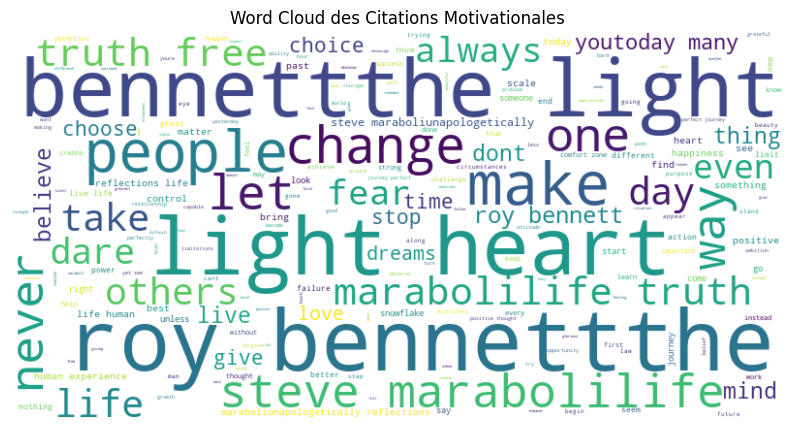


Top 10 mots les plus fréquents pour Arthur C. Clarke:
[('way', 2), ('“', 1), ('discovering', 1), ('limits', 1), ('possible', 1), ('venture', 1), ('little', 1), ('past', 1), ('impossible', 1), ('”', 1)]

Top 10 mots les plus fréquents pour Bernard Branson:
[('“', 1), ('rejection', 1), ('opportunity', 1), ('selection', 1), ('”', 1), ('―bernard', 1), ('branson', 1)]

Top 10 mots les plus fréquents pour Bohdi Sanders,:
[('anger', 2), ('wisdom', 2), ('“', 1), ('never', 1), ('respond', 1), ('angry', 1), ('person', 1), ('fiery', 1), ('comeback', 1), ('even', 1)]

Top 10 mots les plus fréquents pour Brandon Sanderson,:
[('step', 2), ('one', 2), ('next', 2), ('“', 1), ('important', 1), ('man', 1), ('take', 1), ('first', 1), ('itits', 1), ('always', 1)]

Top 10 mots les plus fréquents pour Bruce Lee,:
[('failure', 2), ('“', 1), ('dont', 1), ('fear', 1), ('—', 1), ('low', 1), ('aim', 1), ('crime', 1), ('great', 1), ('attempts', 1)]

Top 10 tags les plus fréquents :
tags
motivational            1

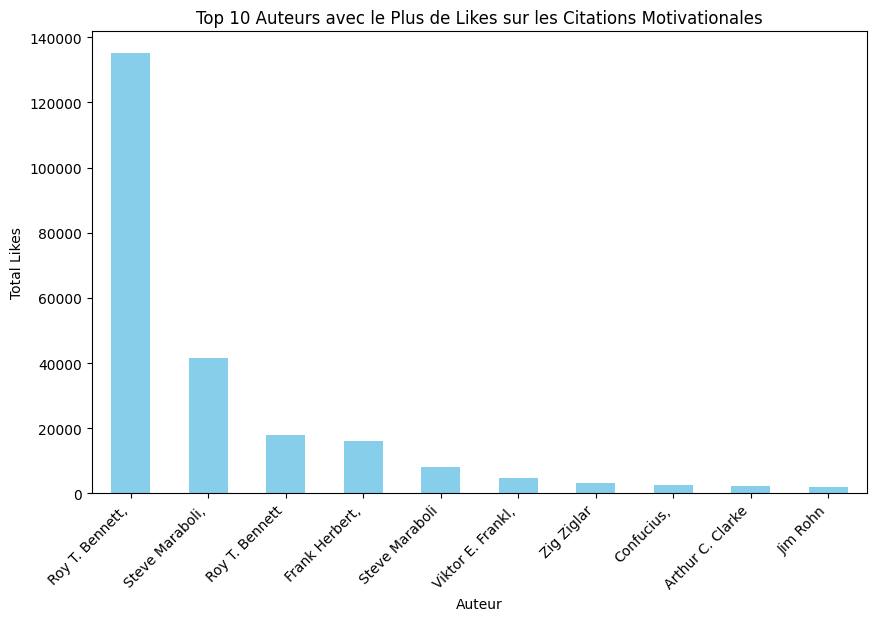

In [31]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from collections import Counter

list_links = [
    "https://www.goodreads.com/quotes/tag/motivational?page=1",
    "https://www.goodreads.com/quotes/tag/motivational?page=2",
    "https://www.goodreads.com/quotes/tag/motivational?page=3",
    "https://www.goodreads.com/quotes/tag/motivational?page=4",
    "https://www.goodreads.com/quotes/tag/motivational?page=5"
]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

all_quotes = []

for link in list_links:

    html = rq.get(link, headers=headers).text
    soup = bs(html, 'html.parser')
    
    quotes = soup.find_all('div', class_='quoteDetails')
    
    for quote in quotes:

        quote_text = quote.find('div', class_='quoteText').get_text(strip=True)
        
        author = quote.find('span', class_='authorOrTitle').get_text(strip=True)
        
        likes = quote.find('a', class_='smallText').get_text(strip=True)
        try:
            likes = int(likes.split()[0].replace(',', ''))
        except:
            likes = 0
        
        tags_div = quote.find('div', class_='greyText smallText left')
        tags = [tag.get_text(strip=True) for tag in tags_div.find_all('a')] if tags_div else []

        all_quotes.append({
            'quote': quote_text,
            'author': author,
            'likes': likes,
            'tags': tags
        })

df = pd.DataFrame(all_quotes)
def clean_and_tokenize(text):
    # Traduction pour enlever la ponctuation et les chiffres
    translator = str.maketrans('', '', string.punctuation + string.digits)
    text = text.translate(translator)
    
    # Tokenisation du texte
    tokens = nltk.word_tokenize(text.lower())
    
    # Filtrer les stopwords (mots vides)
    en_stopwords = stopwords.words('english')
    en_stopwords = set(en_stopwords)
    words = [w for w in tokens if w not in en_stopwords]
    
    return words

df.to_csv('data/goodreads_motivational_quotes.csv', index=False)
print(df)
all_quotes_text = ' '.join(df['quote'].dropna())

words = clean_and_tokenize(all_quotes_text)

cnt_fdist = nltk.FreqDist(words)
print(cnt_fdist.most_common(20))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud des Citations Motivationales')
plt.show()

df['words'] = df['quote'].dropna().apply(clean_and_tokenize)
author_words = df.groupby('author')['words'].apply(lambda x: [word for words in x for word in words])

author_word_freq = author_words.apply(lambda x: nltk.FreqDist(x))

for author, freq in author_word_freq.head(5).items():
    print(f"\nTop 10 mots les plus fréquents pour {author}:")
    print(freq.most_common(10))


df['tags'] = df['tags'].apply(lambda x: [tag.lower() for tag in x])

tag_words = df.explode('tags')['tags'].dropna()

tag_word_freq = tag_words.value_counts()

print("\nTop 10 tags les plus fréquents :")
print(tag_word_freq.head(10))
author_likes = df.groupby('author')['likes'].sum().sort_values(ascending=False)


author_likes.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Auteurs avec le Plus de Likes sur les Citations Motivationales')
plt.ylabel('Total Likes')
plt.xlabel('Auteur')
plt.xticks(rotation=45, ha='right')
plt.show()